# Computational graph

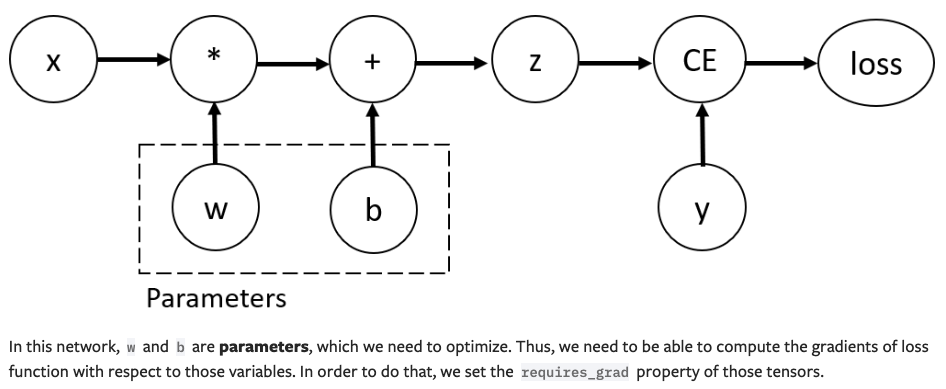

In [30]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [31]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7fd39324e8b0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7fd3932cacd0>


# Computing Gradients

In [32]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0494, 0.1815, 0.0625],
        [0.0494, 0.1815, 0.0625],
        [0.0494, 0.1815, 0.0625],
        [0.0494, 0.1815, 0.0625],
        [0.0494, 0.1815, 0.0625]])
tensor([0.0494, 0.1815, 0.0625])


# Disabling Gradient Tracking


## torch.no_grade()
* By default, all tensors with `requires_grad=True` are tracking their computational history and support gradient computation.

In [33]:
z = torch.matmul(x, w) + b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w) + b
print(z.requires_grad)


True
False


## .detach()

In [36]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

True
False
